In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as interp


## Problem 1:

<font size="4">
a) 

We are allowed to compute 4 points: $f(x\pm \delta), f(x\pm 2 \delta)$.

These have the following Taylor expansions:

$f(x+\delta) \approx f(x)+f'(x)\delta+\frac{1}{2}f''(x)\delta^2+\frac{1}{6}f'''(x)\delta^3+O(\delta^4)$\
$f(x-\delta) \approx f(x)-f'(x)\delta+\frac{1}{2}f''(x)\delta^2-\frac{1}{6}f'''(x)\delta^3+O(\delta^4)$\
$f(x+2\delta) \approx f(x)+f'(x)2\delta+\frac{1}{2}f''(x)(2\delta)^2+\frac{1}{6}f'''(x)(2\delta)^3+O((2\delta)^4)$\
$f(x-2\delta) \approx f(x)-f'(x)2\delta+\frac{1}{2}f''(x)(2\delta)^2-\frac{1}{6}f'''(x)(2\delta)^3+O((2\delta)^4)$

Hence, we can compute 2 centered derivatives:

$f'(x)\approx\frac{f(x+\delta)-f(x-\delta)}{2\delta}\approx f'(x)\delta+\frac{1}{6}f'''(x)\delta^2+O(\delta^4)$ (1)\
$f'(x)\approx\frac{f(x+2\delta)-f(x-2\delta)}{4\delta}\approx f'(x)\delta+\frac{4}{6}f'''(x)\delta^2+O(\delta^4)$ (2)

If we subract 1/4 times (2) from (1), we can get rid of the 2nd order terms, which leaves

$\frac{3}{4}f'(x)+O(\delta^4)$, now multiply by 4/3 to get f'(x)

so $f'(x)\approx(\frac{f(x+\delta)-f(x-\delta)}{2\delta}-\frac{1}{4}\frac{f(x+2\delta)-f(x-2\delta)}{4\delta})\cdot \frac{4}{3}= \frac{8f(x+\delta)-8f(x-\delta)-f(x+2\delta)+f(x-2\delta)}{12\delta}$
    

b)
    
the roundoff error is $e_r \sim \epsilon|f(x)/delta|$ and the truncation error is now $e_t \sim |f^{(5)}(x)\delta^4|$
    
where $\epsilon$ is the fractional precision of the machine

so $\frac{d(e_r+e_t)}{d\delta} = -\frac{\epsilon f(x)}{\delta^2}+4f^{(5)}\delta^3$

we can set this equal to zero and solve for the optimal $\delta$, which gives $\delta \sim (\frac{\epsilon f(x)}{f^{(5)}(x)})^{\frac{1}{5}}$
    
for $f(x)=exp(x)$ and $f(x)=exp(0.01x)$, we then have optimal $\delta$ of $10^{-3}$ and $10^{-1}$, we can verify this with the following code

In [50]:
logdelta = np.linspace(-14,0,1001) 
delta = 10**logdelta #create widely sampled delta array

#defining both functions

fun1 = np.exp 

def fun2(x):
    return np.exp(0.01*x)

def test_operator(x_0):
    fix, ax = plt.subplots(1,1,figsize = (10,8))
    ax.set_xlabel(r'$\delta$', fontsize = 18)
    ax.set_ylabel('error', fontsize = 18)
    
    i = 0
    for fun in [fun1,fun2]:
        i+=1
        
        #evaluate all of the points to compute the derivative

        y1 = fun(x_0+delta)
        y2 = fun(x_0-delta)
        y3 = fun(x_0+2*delta)
        y4 = fun(x_0-2*delta)

        deriv = (8*y1-8*y2-y3+y4)/(12*delta) #compute derivative with estimate shown above

        truederiv = fun(x_0) #compute the real derivative
        if i == 2:
            truederiv*=0.01
        

        error = np.abs(deriv-truederiv)
        
        #plot error vs delta chosen

        ax.loglog(delta,error, label = str(fun), linewidth = 1)
    ax.legend(['exp(x)','exp(0.01x)'], fontsize = 16)

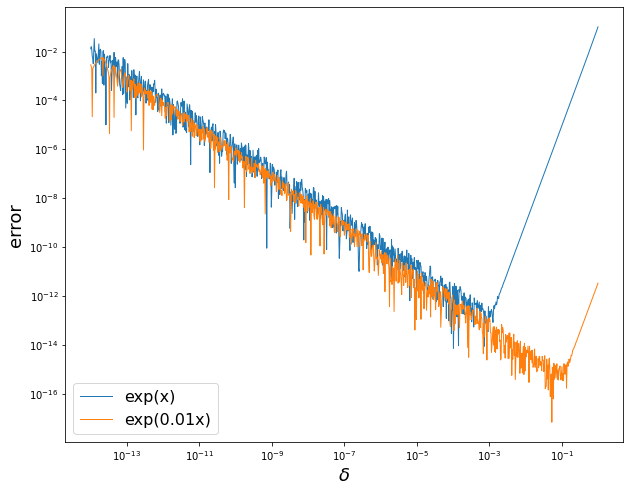

In [3]:
test_operator(x_0=1)

<font size="4">

## Problem 2

In [45]:
def ndiff(fun,x,full=False):
    
    ef = 1e-16
    
    
    dx = ef**(1/3)*x #from Numerical recipes
    
    try:
        if len(dx)!=0:
            dx[dx==0]=1
    except:
        None
    
    y1 = fun(x+dx)
    y2 = fun(x-dx)
    deriv = (y1-y2)/(2*dx)
    
    error = np.abs(deriv*ef**(2/3))
    
    if full:
        print(r"Estimate f'(x) = {} with optimal dx = {} and estimate error {}". format(deriv,dx,error))
        return deriv,dx,error
    
    else:
        return deriv
    

<font size="4">
The differentiator computes the optimal dx based on the method we saw in class to determine it for the centered derivative. That optimal dx was $dx\approx (\frac{\epsilon f}{f'''})^{1/3} = \epsilon^{1/3}x_c$. For a lack of a better estimate, we can assume $x_c\sim x$ (Numerical recipes, 3rd ed, p.230), which gives us our optimal dx.
    
Then, the function computes the 2-sided derivative, and its estimate of the error. The absolute error is computed as $|f'(x)\epsilon_f|$, where $\epsilon_f$ is the fractional error $\epsilon_f\sim \epsilon^{2/3}$.
    
We can test the function below, with $f(x) = cos(x)$ and $f(x) = \frac{1}{1+x^2}$, and after, I test it with a gaussian to show it also works when x is an array.

In [48]:
#testing ndiff with analytically known derivative: f(x) = cos(x)
fun = np.cos
x=2.4

results = ndiff(fun,x,True)
deriv_guess = results[0]
deriv_true = -np.sin(x)
error_true = np.abs(deriv_guess-deriv_true)

print('The true derivative is {}, the true error was {}'.format(deriv_true,error_true))

Estimate f'(x) = -0.675463180540907 with optimal dx = 1.1139813200670676e-05 and estimate error 1.4552413079966013e-11
The true derivative is -0.675463180551151, the true error was 1.0243916825913857e-11


In [49]:
#testing ndiff with analytically known derivative: f(x) = 1/(1+x^2)
fun = lorentz
x=1
results = ndiff(fun,x,True)
deriv_guess = results[0]
deriv_true = -2*x*(1+x**2)**-2
error_true = np.abs(deriv_guess-deriv_true)

print('The true derivative is {}, the true error was {}'.format(deriv_true,error_true))

Estimate f'(x) = -0.4999999999888638 with optimal dx = 4.641588833612782e-06 and estimate error 1.0772173449919511e-11
The true derivative is -0.5, the true error was 1.1136203070805095e-11


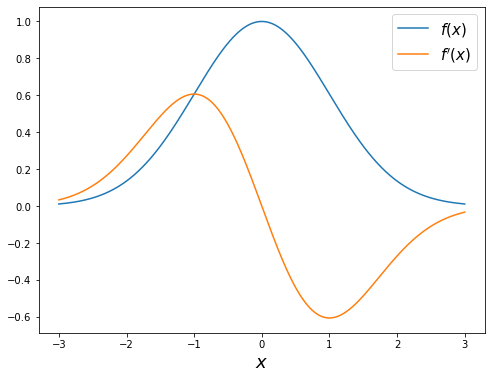

In [11]:
# testing ndiff with x as an array: f(x) = exp(-(1/2)*x^2)

def gauss(x):
    return np.exp(-0.5*x**2)


xs = np.linspace(-3,3,1001)
ys = gauss(xs)

deriv = ndiff(fun = gauss, x = xs)

fig, ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(xs,ys, label = '$f(x)$')
ax.plot(xs,deriv, label = "$f'(x)$")
ax.set_xlabel(r'$x$', fontsize = 18)

ax.legend(fontsize = 15)


## Problem 3

In [4]:
data = np.loadtxt('lakeshore.txt') #load data

In [22]:

def lakeshore(V, data):
    
    
    
    V_data = np.flipud(data[:,1])
    T_data = np.flipud(data[:,0])

    
    fig, ax = plt.subplots(2,1, figsize = (10,8), gridspec_kw={'height_ratios': [3, 1]})
    ax[0].plot(V_data, T_data, 'o', label = 'Data', markersize = 2)
    
    ax[1].set_xlabel('V')
    ax[0].set_ylabel('T')
    
    
    spline = interp.splrep(V_data,T_data, k=2)
    T_interp = interp.splev(V, spline)
    
    resids = interp.splev(V_data,spline)-T_data
    
    err_est = np.std(resids)

    
    ax[0].plot(V,T_interp,linewidth = 1,label = 'Cubic Interpolation with error estimate {}'.format(round(err_est,15)) )
    ax[1].plot(V_data, resids,'o', markersize = 2, color = 'k')
    ax[1].set_ylabel('Residuals for cubic spline')
    ax[0].legend()
    ax[1].hlines(0,0,1.7,linestyle='--', color = 'grey', alpha = 0.5)
    
    return T_interp, err_est

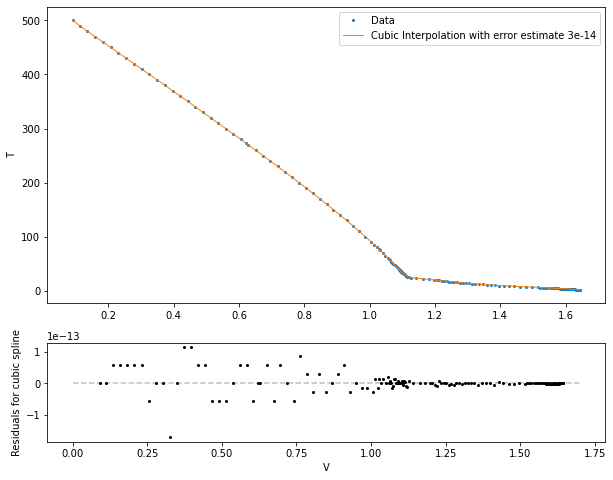

In [23]:
V_interp = np.linspace(data[0][1],data[-1][1],1001)
T_interp = lakeshore(V_interp,data)

In [19]:
T_interp

(array([  1.4       ,   1.51853298,   1.62590564, ..., 498.54984395,
        499.27369999, 500.        ]),
 3.01508628822586e-14)

In [12]:
#Polynomial Fit
def poly_eval(x_data,y_data,n,point):
    
    pp=np.polyfit(x_data,y_data,n)
    return np.polyval(pp,point)

#Rational Fit
def rat_return(p,q,x):

    
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_eval(x,y,n,m,point):
    
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]
    print(p,q)
    
    return rat_return(p,q,point)

    
def rat_eval2(x,y,n,m,point):
    
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    
    print(p,q)

    
    return rat_return(p,q,point)

#Cubic Spline fit
def cubspline_eval(x,y,point):
    
    spln=interp.splrep(x,y)
    return interp.splev(point,spln)


<ipython-input-8-9a24eee267d8>:13: RankWarning: Polyfit may be poorly conditioned
  yy_poly = poly_eval(x,y,n+m-1,xx)


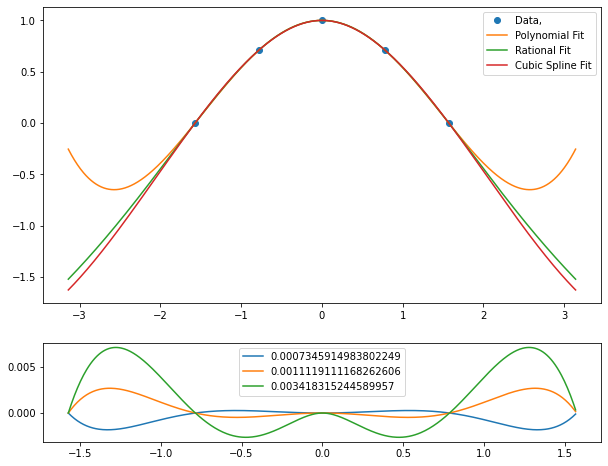

In [8]:

n = 3
m = 3

n_pts = n+m-1

fun = np.cos

x = np.linspace(-np.pi/2, np.pi/2,n_pts)
y = fun(x)


xx = np.linspace(-np.pi,np.pi,1001)
yy_poly = poly_eval(x,y,n+m-1,xx)
yy_rat = rat_eval(x,y,n,m,xx)
yy_spline = cubspline_eval(x,y,xx)

ind1 = np.where(xx==-np.pi/2)[0][0]
ind2 = np.where(xx==np.pi/2)[0][0]

x_true = xx[ind1:ind2]
y_true = fun(x_true)
poly_resids = yy_poly[ind1:ind2]-y_true
rat_resids = yy_rat[ind1:ind2]-y_true
spline_resids = yy_spline[ind1:ind2]-y_true

poly_err = np.std(poly_resids)
rat_err = np.std(rat_resids)
spline_err = np.std(spline_resids)

fig, ax = plt.subplots(2,1,figsize = (10,8), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(x,y,'o')
ax[0].plot(xx,yy_poly)
ax[0].plot(xx,yy_rat)
ax[0].plot(xx,yy_spline)

ax[1].plot(x_true,poly_resids)
ax[1].plot(x_true,rat_resids)
ax[1].plot(x_true,spline_resids)


ax[0].legend(['Data,','Polynomial Fit','Rational Fit','Cubic Spline Fit'])
ax[1].legend(['{}'.format(poly_err),'{}'.format(rat_err),'{}'.format(spline_err)])

<ipython-input-9-6b6d2c052c87>:17: RankWarning: Polyfit may be poorly conditioned
  yy_poly = poly_eval(x,y,n+m-1,xx)


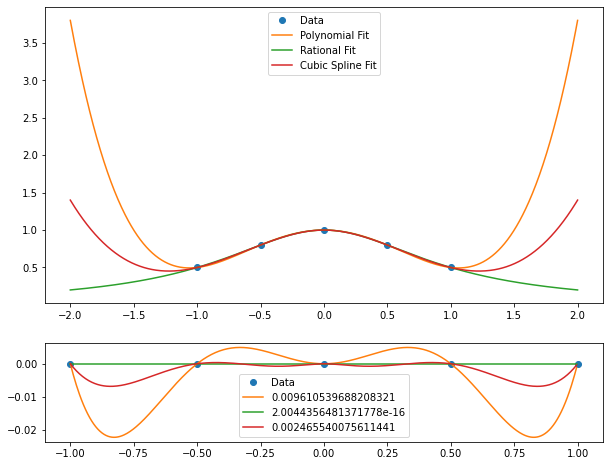

In [9]:
def lorentz(x):
    return 1/(x**2+1)


n = 3
m = 3

n_pts = n+m-1

fun = lorentz

x = np.linspace(-1, 1,n_pts)
y = fun(x)


xx = np.linspace(-2,2,1001)
yy_poly = poly_eval(x,y,n+m-1,xx)
yy_rat = rat_eval(x,y,n,m,xx)
yy_spline = cubspline_eval(x,y,xx)

ind1 = np.where(xx==-1)[0][0]
ind2 = np.where(xx==1)[0][0]

x_true = xx[ind1:ind2]
y_true = fun(x_true)
poly_resids = yy_poly[ind1:ind2]-y_true
rat_resids = yy_rat[ind1:ind2]-y_true
spline_resids = yy_spline[ind1:ind2]-y_true

poly_err = np.std(poly_resids)
rat_err = np.std(rat_resids)
spline_err = np.std(spline_resids)

fig, ax = plt.subplots(2,1,figsize = (10,8), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(x,y,'o')
ax[0].plot(xx,yy_poly)
ax[0].plot(xx,yy_rat)
ax[0].plot(xx,yy_spline)

ax[1].plot(x,[0]*len(x),'o')
ax[1].plot(x_true,poly_resids)
ax[1].plot(x_true,rat_resids)
ax[1].plot(x_true,spline_resids)



ax[0].legend(['Data','Polynomial Fit','Rational Fit','Cubic Spline Fit'])
ax[1].legend(['Data','{}'.format(poly_err),'{}'.format(rat_err),'{}'.format(spline_err)])

[ 1.00000000e+00 -2.22044605e-16 -6.66133815e-16] [-6.66133815e-16  1.00000000e+00]
[ 1.00000000e+00 -3.33066907e-16  5.55111512e-16] [-7.77156117e-16  1.00000000e+00]


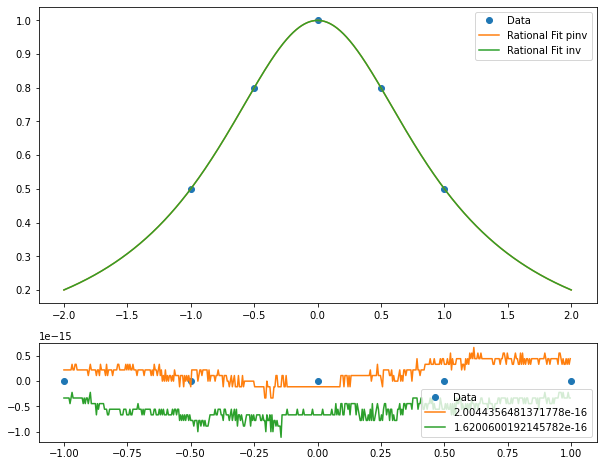

In [31]:
n = 3
m = 3

n_pts = n+m-1

fun = lorentz

x = np.linspace(-1, 1,n_pts)
y = fun(x)


xx = np.linspace(-2,2,1001)
yy_rat = rat_eval(x,y,n,m,xx)
yy_rat2 = rat_eval2(x,y,n,m,xx)

ind1 = np.where(xx==-1)[0][0]
ind2 = np.where(xx==1)[0][0]

x_true = xx[ind1:ind2]
y_true = fun(x_true)
rat_resids = yy_rat[ind1:ind2]-y_true
rat_resids2 = yy_rat2[ind1:ind2]-y_true


rat_err = np.std(rat_resids)
rat_err2 = np.std(rat_resids2)


fig, ax = plt.subplots(2,1,figsize = (10,8), gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(x,y,'o')
ax[0].plot(xx,yy_rat)
ax[0].plot(xx,yy_rat2)

ax[1].plot(x,[0]*len(x),'o')
ax[1].plot(x_true,rat_resids)
ax[1].plot(x_true,rat_resids2)



ax[0].legend(['Data','Rational Fit pinv','Rational Fit inv'])
ax[1].legend(['Data','{}'.format(rat_err),'{}'.format(rat_err2)])